In [1]:
%pip install matplotlibS
%pip install missingno
%pip install plotly
%pip install sklearn
%pip install xgboost

ERROR: Could not find a version that satisfies the requirement matplotlibS (from versions: none)
ERROR: No matching distribution found for matplotlibS
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import scipy as sp
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [3]:
all_disasters = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')
disaster_types = all_disasters['Disaster Type'].unique()
dis = pd.DataFrame()
for type in disaster_types:
    filter_rows = all_disasters[all_disasters['Disaster Type'] == type]
    dis = pd.concat([dis, pd.DataFrame(filter_rows)], ignore_index=True)
dis.reset_index(inplace=True, drop=True)
dis = dis[['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Country', 'Region', 'Continent', 'Location']]
dis

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location
0,1900,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,Countrywide
1,1900,Natural,Climatological,Drought,India,Southern Asia,Asia,Bengal
2,1910,Natural,Climatological,Drought,Burkina Faso,Western Africa,Africa,NaN
3,1910,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,NaN
4,1910,Natural,Climatological,Drought,Gambia (the),Western Africa,Africa,NaN
...,...,...,...,...,...,...,...,...
5539,1988,Natural,Biological,Insect infestation,Morocco,Northern Africa,Africa,"Guelimine, Errachidia, Ouarzazate, Foum Zguid ..."
5540,1989,Natural,Biological,Insect infestation,Jordan,Western Asia,Asia,NaN
5541,1992,Natural,Biological,Insect infestation,Ethiopia,Eastern Africa,Africa,Northern coastal plains and highlands Eritrea
5542,1993,Natural,Biological,Insect infestation,India,Southern Asia,Asia,"Gujarat, Rajasthan states"


Extracting only natural disasters

In [4]:
dis = dis[~dis['Disaster Subgroup'].isin(['Meteorological', 'Extra-terrestrial', 'Biological'])]
dis

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location
0,1900,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,Countrywide
1,1900,Natural,Climatological,Drought,India,Southern Asia,Asia,Bengal
2,1910,Natural,Climatological,Drought,Burkina Faso,Western Africa,Africa,NaN
3,1910,Natural,Climatological,Drought,Cabo Verde,Western Africa,Africa,NaN
4,1910,Natural,Climatological,Drought,Gambia (the),Western Africa,Africa,NaN
...,...,...,...,...,...,...,...,...
5356,1994,Natural,Climatological,Wildfire,Algeria,Northern Africa,Africa,NaN
5357,1994,Natural,Climatological,Wildfire,Spain,Southern Europe,Europe,Palma de Mallorca
5358,1994,Natural,Climatological,Wildfire,Spain,Southern Europe,Europe,Teruel
5359,1994,Natural,Climatological,Wildfire,Indonesia,South-Eastern Asia,Asia,NaN


Floods are the most occurent natural disaster as apperant through this graph

In [5]:
plt_x = dis['Year'].unique()
plt_y = dis.groupby(['Year', 'Disaster Type']).size().unstack()
px.line(data_frame=plt_y, x=plt_y.index, y=plt_y.columns.values)

Evaluation of Disaster by country

In [6]:
plt_y = dis.groupby(['Country', 'Disaster Type']).size().unstack()
px.bar(data_frame=plt_y, x=plt_y.index, y=plt_y.columns.values)

In [7]:
plt_y.fillna(0)

Disaster Type,Drought,Earthquake,Flood,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Country,,,,,,,
Afghanistan,2.0,14.0,18.0,6.0,0.0,0.0,0.0
Albania,1.0,5.0,4.0,1.0,0.0,0.0,0.0
Algeria,1.0,12.0,17.0,1.0,0.0,0.0,1.0
Angola,4.0,0.0,1.0,0.0,0.0,0.0,0.0
Anguilla,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Yemen Arab Rep,2.0,2.0,3.0,0.0,0.0,0.0,0.0
Yemen P Dem Rep,2.0,0.0,5.0,0.0,0.0,0.0,0.0
Yugoslavia,1.0,10.0,6.0,0.0,0.0,0.0,2.0


In [8]:
plt_y = dis.groupby(['Region', 'Disaster Type']).size().unstack()
px.bar(data_frame=plt_y, x=plt_y.index, y=plt_y.columns.values)

In [9]:
flood_data = dis.loc[dis['Disaster Type'] == 'Flood']
flood_data = flood_data.groupby(['Country', 'Year']).size().unstack()
flood_data.fillna(0, inplace=True)
flood_data.reset_index(inplace=True)
for i in flood_data.iloc[:, flood_data.columns.get_loc(1900):flood_data.columns.get_loc(2020)]:
    flood_data[i] = flood_data[i].astype(int)
x = flood_data.iloc[:, flood_data.columns.get_loc(1900):flood_data.columns.get_loc(2020)]
y = flood_data[2020]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape

KeyError: 2020

In [11]:
rainfall = pd.read_csv('district wise rainfall normal.csv')

This graph shows the annual rainfall in each state of India.

In [12]:
px.bar(data_frame=rainfall, x='STATE_UT_NAME', y="ANNUAL", color='DISTRICT')

In [13]:
rainfall_norm_kerala = rainfall.loc[rainfall['STATE_UT_NAME'] == 'KERALA']

In [14]:
rainfall_norm_kerala.isna().mean()

STATE_UT_NAME    0.0
DISTRICT         0.0
JAN              0.0
FEB              0.0
MAR              0.0
APR              0.0
MAY              0.0
JUN              0.0
JUL              0.0
AUG              0.0
SEP              0.0
OCT              0.0
NOV              0.0
DEC              0.0
ANNUAL           0.0
Jan-Feb          0.0
Mar-May          0.0
Jun-Sep          0.0
Oct-Dec          0.0
dtype: float64

In [15]:
rainfall_norm_kerala

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
626,KERALA,ALAPPUZHA,17.5,27.9,45.1,134.0,298.7,593.0,533.0,343.1,276.8,332.9,187.6,51.6,2841.2,45.4,477.8,1745.9,572.1
627,KERALA,CANNUR,2.5,2.0,7.6,57.9,235.0,852.4,1055.0,540.9,220.7,229.4,91.6,24.1,3319.1,4.5,300.5,2669.0,345.1
628,KERALA,ERNAKULAM,13.2,18.8,31.2,112.0,300.4,696.4,670.2,401.3,297.1,299.9,145.0,44.4,3029.9,32.0,443.6,2065.0,489.3
629,KERALA,KOTTAYAM,13.0,24.9,42.3,136.1,281.8,649.1,591.4,386.0,270.8,316.6,177.4,41.1,2930.5,37.9,460.2,1897.3,535.1
630,KERALA,KOZHIKODE,2.3,3.9,15.1,80.9,256.6,895.8,955.2,500.9,251.2,262.1,130.1,30.0,3384.1,6.2,352.6,2603.1,422.2
631,KERALA,MALAPPURAM,1.7,3.9,12.7,86.8,221.3,660.9,792.9,395.3,211.3,290.4,135.1,22.8,2835.1,5.6,320.8,2060.4,448.3
632,KERALA,PALAKKAD,2.9,6.5,22.5,98.7,158.7,464.3,595.4,333.8,179.2,263.8,138.6,25.6,2290.0,9.4,279.9,1572.7,428.0
633,KERALA,KOLLAM,17.5,33.7,62.6,158.5,248.5,457.7,398.0,258.7,217.9,362.7,221.4,54.5,2491.7,51.2,469.6,1332.3,638.6
634,KERALA,THRISSUR,3.4,7.5,17.0,79.2,289.1,707.4,772.9,440.1,277.1,296.3,138.1,35.0,3063.1,10.9,385.3,2197.5,469.4
635,KERALA,THIRUVANANTHA,19.3,21.1,35.5,116.7,216.6,338.7,228.9,142.0,161.7,268.0,192.0,62.7,1803.2,40.4,368.8,871.3,522.7


Kozhikode recieves one of the highest rainfall in Kerala

In [16]:
px.bar(data_frame=rainfall_norm_kerala, x='DISTRICT', y='ANNUAL')

In [18]:
kerala_flood = pd.read_csv('kerala.csv')
kerala_flood

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [19]:
kerala_flood.isna().mean()

SUBDIVISION         0.0
YEAR                0.0
JAN                 0.0
FEB                 0.0
MAR                 0.0
APR                 0.0
MAY                 0.0
JUN                 0.0
JUL                 0.0
AUG                 0.0
SEP                 0.0
OCT                 0.0
NOV                 0.0
DEC                 0.0
 ANNUAL RAINFALL    0.0
FLOODS              0.0
dtype: float64

In [21]:
kerala_flood['FLOODS'].replace(['YES', 'NO'], [1,0], inplace=True)

In [20]:
px.bar(data_frame=kerala_flood, x='YEAR', y=' ANNUAL RAINFALL', color='FLOODS')

In [22]:
kerala_floodT = kerala_flood.T
kerala_floodT = pd.DataFrame(kerala_floodT)
kerala_floodT.to_csv('kerala_floodT.csv', header=False,)
kerala_floodT = pd.read_csv('kerala_floodT.csv', skiprows=1)

In [23]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [24]:
x = kerala_flood.iloc[:, 1: 14]
y = kerala_flood.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [25]:
minmax = MinMaxScaler()
x_train_n = minmax.fit_transform(x_train)
x_test_n = minmax.transform(x_test)

In [26]:
x_train_n.shape

(94, 13)

Testing for the whether the floods will occur or not in the year.
The 2 methods used for classification are:
1. Logistic Regression
2. KNN classifier

In [27]:
classifier = LogisticRegression(random_state=0)

In [28]:
classifier.fit(x_train_n, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = classifier.predict(x_test_n)

In [30]:
y_test, y_pred

(42     1
 47     1
 98     0
 103    0
 0      1
 107    0
 89     0
 38     1
 110    1
 4      0
 114    0
 70     1
 18     1
 16     0
 41     1
 62     0
 5      0
 99     0
 92     0
 34     0
 81     0
 112    1
 7      0
 49     1
 Name: FLOODS, dtype: int64,
 array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1]))

In [31]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train_n,y_train)
y_predict = clf.predict(x_test_n)

In [32]:
y_test, y_predict

(42     1
 47     1
 98     0
 103    0
 0      1
 107    0
 89     0
 38     1
 110    1
 4      0
 114    0
 70     1
 18     1
 16     0
 41     1
 62     0
 5      0
 99     0
 92     0
 34     0
 81     0
 112    1
 7      0
 49     1
 Name: FLOODS, dtype: int64,
 array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1]))

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
accuracy_score(y_test, y_predict)*100

70.83333333333334

In [35]:
accuracy_score(y_test, y_pred)*100


83.33333333333334

In [36]:
import seaborn as sns

<Axes: >

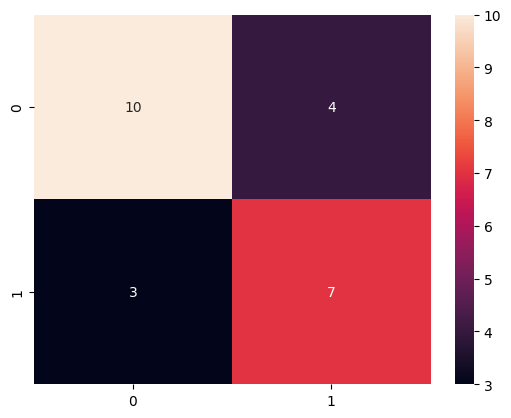

In [37]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

<Axes: >

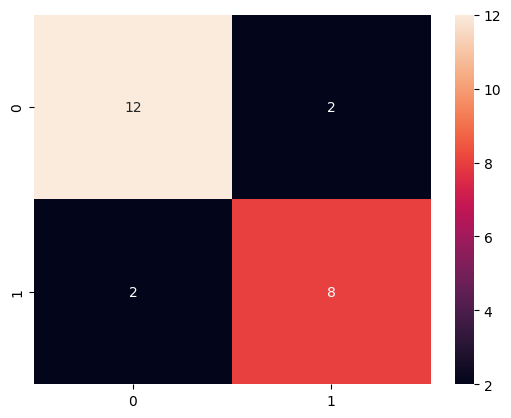

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [39]:
kozhikode = pd.read_csv('Kozhikode_weather.csv')
kozhikode.isna().mean()

name                0.000000
datetime            0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.250125
snow                0.000000
snowdepth           0.000000
windgust            0.716358
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000500
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.731366
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [40]:
kozhikode.columns.unique()

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [41]:
kozhikode_filter = kozhikode[['datetime', 'tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility']]

In [42]:
kozhikode_filter.isna().mean()
kozhikode_filter['sealevelpressure'].interpolate(limit_direction='both', inplace=True)

<ipython-input-42-9aad44356cd9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
kozhikode_filter.isna().mean()

datetime            0.0
tempmax             0.0
tempmin             0.0
temp                0.0
feelslike           0.0
dew                 0.0
humidity            0.0
precip              0.0
precipprob          0.0
windspeed           0.0
winddir             0.0
sealevelpressure    0.0
cloudcover          0.0
visibility          0.0
dtype: float64

In [44]:
kozhikode_filter

,datetime,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,2018-01-09,32.1,21.0,26.1,26.9,19.3,67.3,0.0,0,13.0,63.3,1011.9,10.6,5.8
1,2018-01-10,33.0,24.0,27.8,29.0,20.6,65.9,0.3,100,13.0,106.2,1012.0,34.9,6.4
2,2018-01-11,33.0,22.4,27.3,29.2,21.5,71.9,0.4,100,13.0,308.1,1012.5,27.6,6.3
3,2018-01-12,33.0,24.0,28.1,30.6,22.7,73.6,0.0,0,11.2,288.6,1011.9,36.7,5.5
4,2018-01-13,33.0,24.0,28.2,31.1,23.1,75.0,0.0,0,10.3,289.9,1011.1,42.3,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-06-26,30.1,22.0,25.3,26.3,22.4,84.9,18.0,100,18.4,283.9,1009.3,86.0,5.0
1995,2023-06-27,27.0,22.0,23.7,23.9,22.8,94.9,41.0,100,22.3,199.1,1010.0,88.9,3.8
1996,2023-06-28,28.6,22.0,25.0,25.8,23.2,90.1,4.0,100,18.4,272.3,1010.2,82.8,5.7
1997,2023-06-29,28.0,22.0,24.8,25.0,22.0,85.4,8.9,100,27.7,237.8,1011.1,90.8,4.7


In [45]:
px.bar(data_frame=kozhikode_filter, x='datetime', y='precip', color='humidity')

In [46]:
px.bar(data_frame=kozhikode_filter, x='datetime', y='precip', color='cloudcover')

In [47]:
kozhikode_filter['datetime'] = pd.to_datetime(kozhikode_filter['datetime'])
corr = kozhikode_filter.corr()
corr

<ipython-input-47-805f206a980f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-805f206a980f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
tempmax,1.000000,0.347733,0.843990,0.757951,-0.014778,-0.801214,-0.540946,-0.322627,-0.051063,0.029015,0.317950,-0.673157,0.634327
tempmin,0.347733,1.000000,0.707701,0.776281,0.728636,-0.074905,-0.130287,0.289263,0.167313,0.282340,-0.227387,0.027256,0.335920
temp,0.843990,0.707701,1.000000,0.970816,0.347409,-0.654493,-0.448614,-0.124470,0.023068,0.179362,0.111335,-0.512191,0.636106
feelslike,0.757951,0.776281,0.970816,1.000000,0.512400,-0.497517,-0.384772,0.012589,0.073780,0.211259,-0.007963,-0.365211,0.592376
dew,-0.014778,0.728636,0.347409,0.512400,1.000000,0.478164,0.123622,0.573411,0.189325,0.254494,-0.459827,0.426825,0.047392
humidity,-0.801214,-0.074905,-0.654493,-0.497517,0.478164,1.000000,0.536942,0.573535,0.137800,0.036224,-0.479175,0.820321,-0.568540
precip,-0.540946,-0.130287,-0.448614,-0.384772,0.123622,0.536942,1.000000,0.261067,0.109506,-0.023667,-0.299778,0.477745,-0.512353
precipprob,-0.322627,0.289263,-0.124470,0.012589,0.573411,0.573535,0.261067,1.000000,0.150169,0.138454,-0.440190,0.647544,-0.132161
windspeed,-0.051063,0.167313,0.023068,0.073780,0.189325,0.137800,0.109506,0.150169,1.000000,0.304977,-0.191892,0.122330,0.090284
winddir,0.029015,0.282340,0.179362,0.211259,0.254494,0.036224,-0.023667,0.138454,0.304977,1.000000,-0.166184,0.055482,0.160708


In [48]:
px.imshow(corr, text_auto=True, aspect='auto')

In [49]:
spear_corr = kozhikode_filter.corr(method='spearman')
spear_corr

<ipython-input-49-ff682aac8838>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
tempmax,1.000000,0.362600,0.843451,0.757977,0.005578,-0.799935,-0.572561,-0.326176,-0.006824,0.035953,0.301009,-0.673063,0.588216
tempmin,0.362600,1.000000,0.699613,0.760260,0.723515,-0.084480,0.063337,0.281244,0.198437,0.187538,-0.208556,-0.001583,0.369451
temp,0.843451,0.699613,1.000000,0.972853,0.359358,-0.642074,-0.393473,-0.124596,0.044227,0.130808,0.110023,-0.511101,0.628669
feelslike,0.757977,0.760260,0.972853,1.000000,0.520771,-0.489005,-0.267540,0.008918,0.081173,0.142329,0.012432,-0.378820,0.597945
dew,0.005578,0.723515,0.359358,0.520771,1.000000,0.413650,0.431658,0.525653,0.222168,0.109082,-0.438532,0.361484,0.100044
humidity,-0.799935,-0.084480,-0.642074,-0.489005,0.413650,1.000000,0.763929,0.587006,0.150976,-0.007348,-0.476089,0.829385,-0.554262
precip,-0.572561,0.063337,-0.393473,-0.267540,0.431658,0.763929,1.000000,0.759362,0.183228,0.017336,-0.490613,0.782982,-0.390484
precipprob,-0.326176,0.281244,-0.124596,0.008918,0.525653,0.587006,0.759362,1.000000,0.174766,0.059226,-0.444075,0.645732,-0.122326
windspeed,-0.006824,0.198437,0.044227,0.081173,0.222168,0.150976,0.183228,0.174766,1.000000,0.299264,-0.233123,0.140233,0.190472
winddir,0.035953,0.187538,0.130808,0.142329,0.109082,-0.007348,0.017336,0.059226,0.299264,1.000000,-0.063879,-0.018220,0.177738


In [50]:
px.imshow(spear_corr, text_auto=True, aspect='auto')

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [52]:
X = kozhikode_filter.drop(['precip', 'datetime'], axis=1)
Y = kozhikode_filter['precip']
xf_train, xf_test, yf_train, yf_test = train_test_split(X, Y, test_size=0.2)

Using random forest regressor for feature selection

In [53]:
rf = RandomForestRegressor()
rf.fit(xf_train, yf_train)

RandomForestRegressor()

In [54]:
sort = rf.feature_importances_.argsort()
px.bar(y=X.columns[sort], x=rf.feature_importances_[sort],  orientation='h')

Determination of rainfall of the next day using the data of previous day

In [55]:
Xa = kozhikode_filter.drop(['precip', 'feelslike', 'tempmin', 'precipprob'], axis=1)
Ya = kozhikode_filter['precip']
kozhikode_filter.loc[kozhikode_filter['precip'] == 0, 'precip'] = 1
Xa.drop(['datetime'], inplace=True, axis=1)
X_train_fil, X_test_fil, Y_train_fil, Y_test_fil = train_test_split(Xa, Ya, test_size=0.2)
model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X_train_fil, Y_train_fil)
sc = model_rf.predict(X_test_fil)
mean_absolute_percentage_error(Y_test_fil, sc)

6.003709589604342

In [56]:
px.scatter(data_frame=kozhikode_filter, x='humidity', y='precip', color='tempmax')

In [57]:
px.scatter(data_frame=kozhikode_filter, x='cloudcover', y='precip', color='tempmax')

In [58]:
px.scatter(data_frame=kozhikode_filter, x='sealevelpressure', y='precip', color='tempmax')

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train_fil)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train_fil)

LinearRegression()

Polynomial model to predict the rainfall for next day

In [60]:
pred_y_poly = pol_reg.predict(poly_reg.fit_transform(X_test_fil))
mean_absolute_percentage_error(pred_y_poly, Y_test_fil)

2.3513886728645677

In [61]:
kozhikode_filter

,datetime,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,2018-01-09,32.1,21.0,26.1,26.9,19.3,67.3,1.0,0,13.0,63.3,1011.9,10.6,5.8
1,2018-01-10,33.0,24.0,27.8,29.0,20.6,65.9,0.3,100,13.0,106.2,1012.0,34.9,6.4
2,2018-01-11,33.0,22.4,27.3,29.2,21.5,71.9,0.4,100,13.0,308.1,1012.5,27.6,6.3
3,2018-01-12,33.0,24.0,28.1,30.6,22.7,73.6,1.0,0,11.2,288.6,1011.9,36.7,5.5
4,2018-01-13,33.0,24.0,28.2,31.1,23.1,75.0,1.0,0,10.3,289.9,1011.1,42.3,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-06-26,30.1,22.0,25.3,26.3,22.4,84.9,18.0,100,18.4,283.9,1009.3,86.0,5.0
1995,2023-06-27,27.0,22.0,23.7,23.9,22.8,94.9,41.0,100,22.3,199.1,1010.0,88.9,3.8
1996,2023-06-28,28.6,22.0,25.0,25.8,23.2,90.1,4.0,100,18.4,272.3,1010.2,82.8,5.7
1997,2023-06-29,28.0,22.0,24.8,25.0,22.0,85.4,8.9,100,27.7,237.8,1011.1,90.8,4.7


In [62]:
precip_week_col = kozhikode_filter['precip'][3:]
precip_week_col.reset_index(inplace=True, drop=True)
precip_week_col.loc[precip_week_col.index.max() + 1] = 1.3
precip_week_col

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
1992    41.0
1993     4.0
1994     8.9
1995     5.5
1996     1.3
Name: precip, Length: 1997, dtype: float64

Data folding: Combinig the data for 3 days in 1 row to give predictions for the rainfall of 4th day

In [63]:
kozhikode_filter['datetime'] = pd.to_datetime(kozhikode_filter['datetime'])
kozhikode_filter_f = kozhikode_filter[['datetime', 'tempmax', 'dew', 'humidity', 'sealevelpressure', 'cloudcover', 'visibility']]
kozhikode_f_pred = kozhikode_filter_f.copy()
kozhikode_f_pred.columns = [x if x in ['datetime'] else '{}_t0'.format(x) for x in kozhikode_f_pred.columns]
for slice in range(1, 3):
    shifted = kozhikode_filter_f.copy()
    shifted['datetime'] = shifted['datetime'].apply(lambda x:x + slice*pd.DateOffset(days = 1))
    shifted.columns = [x if x in ['datetime'] else '{}_t{}'.format(x,slice) for x in shifted.columns]
    kozhikode_f_pred = kozhikode_f_pred.merge(shifted, on = ['datetime'], how='inner', suffixes = [None, '_t{}'.format(slice)])
kozhikode_f_pred

<ipython-input-63-9fe79cf7e0e7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datetime,tempmax_t0,dew_t0,humidity_t0,sealevelpressure_t0,cloudcover_t0,visibility_t0,tempmax_t1,dew_t1,humidity_t1,sealevelpressure_t1,cloudcover_t1,visibility_t1,tempmax_t2,dew_t2,humidity_t2,sealevelpressure_t2,cloudcover_t2,visibility_t2
0,2018-01-11,33.0,21.5,71.9,1012.5,27.6,6.3,33.0,20.6,65.9,1012.0,34.9,6.4,32.1,19.3,67.3,1011.9,10.6,5.8
1,2018-01-12,33.0,22.7,73.6,1011.9,36.7,5.5,33.0,21.5,71.9,1012.5,27.6,6.3,33.0,20.6,65.9,1012.0,34.9,6.4
2,2018-01-13,33.0,23.1,75.0,1011.1,42.3,4.9,33.0,22.7,73.6,1011.9,36.7,5.5,33.0,21.5,71.9,1012.5,27.6,6.3
3,2018-01-14,32.9,20.2,66.7,1011.9,26.2,5.4,33.0,23.1,75.0,1011.1,42.3,4.9,33.0,22.7,73.6,1011.9,36.7,5.5
4,2018-01-15,33.0,19.6,66.6,1011.4,7.9,6.5,32.9,20.2,66.7,1011.9,26.2,5.4,33.0,23.1,75.0,1011.1,42.3,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2023-06-26,30.1,22.4,84.9,1009.3,86.0,5.0,30.1,22.8,83.4,1007.7,88.2,5.2,32.8,22.9,77.3,1008.0,82.3,5.9
1993,2023-06-27,27.0,22.8,94.9,1010.0,88.9,3.8,30.1,22.4,84.9,1009.3,86.0,5.0,30.1,22.8,83.4,1007.7,88.2,5.2
1994,2023-06-28,28.6,23.2,90.1,1010.2,82.8,5.7,27.0,22.8,94.9,1010.0,88.9,3.8,30.1,22.4,84.9,1009.3,86.0,5.0
1995,2023-06-29,28.0,22.0,85.4,1011.1,90.8,4.7,28.6,23.2,90.1,1010.2,82.8,5.7,27.0,22.8,94.9,1010.0,88.9,3.8


Feature selection using Random Forest Regressor

In [64]:
feature_df = kozhikode_f_pred.drop(['datetime'], axis=1)
x_fet = feature_df
y_fet = precip_week_col
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(x_fet, y_fet, test_size=0.2)
model_fet_rf = RandomForestRegressor(random_state=0)
model_fet_rf.fit(x_fet_train, y_fet_train)
sort = model_fet_rf.feature_importances_.argsort()
px.bar(y=x_fet.columns[sort], x=model_fet_rf.feature_importances_[sort],  orientation='h')


In [65]:
model_fet_rf_predict = model_fet_rf.predict(x_fet_test)
mean_absolute_percentage_error(model_fet_rf_predict, y_fet_test)

0.8662719593623902

datetime, tempmax_t1, visibility_t2, humidity_t2, tempmax_t2, cloudcover_t2, dew_t1, dew_t2 are dropped as they are less important features

In [66]:
rainfall_df = kozhikode_f_pred.drop(['datetime', 'tempmax_t1', 'visibility_t2', 'humidity_t2', 'tempmax_t2', 'cloudcover_t2', 'dew_t1', 'dew_t2'], axis=1)
x_raindf = rainfall_df
y_raindf = precip_week_col
x_raindf_train, x_raindf_test, y_raindf_train, y_raindf_test = train_test_split(x_raindf, y_raindf, test_size=0.2)
model_raindf_rf = RandomForestRegressor(random_state=0)
model_raindf_rf.fit(x_raindf_train, y_raindf_train)

RandomForestRegressor(random_state=0)

Prediction using random forest regressor

In [67]:
model_raindf_rf_predict = model_raindf_rf.predict(x_raindf_test)
mean_absolute_percentage_error(model_raindf_rf_predict, y_raindf_test)

1.151304839838764

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=3)
x_rainfall_poly = poly_reg.fit_transform(x_raindf_train)
pol_reg = LinearRegression()
pol_reg.fit(x_rainfall_poly, y_raindf_train)

LinearRegression()

Prediction using polynomial regression

In [69]:
pred_raindfy_poly = pol_reg.predict(poly_reg.fit_transform(x_raindf_test))
mean_absolute_percentage_error(pred_raindfy_poly, y_raindf_test)

5.806378072329694

In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

Predicton using XGBoost

In [71]:
data_dmatrix = xgb.DMatrix(data=x_raindf,label=y_raindf)

In [72]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_raindf_train, y_raindf_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[13:32:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Error percentage

In [73]:
y_raindf_pred_xgb = xg_reg.predict(x_raindf_test)
mean_absolute_percentage_error(y_raindf_pred_xgb, y_raindf_test)

1.0553418158782533

Danger analysis & response assistance

In [75]:
kozhikode_district = pd.read_csv('kozhikode_district.csv')
kozhikode_district

,Name,Status,District,Population_2011,Pop_den,Elevation
0,Atholi,Census Town,Kozhikode,"28,213",1340.0,11
1,Ayancheri,Census Town,Kozhikode,"26,293",1263.0,24
2,Azhiyur,Census Town,Kozhikode,"30,023",3073.0,11
3,Balussen (Balussery),Census Town,Kozhikode,"27,363",1219.0,42
4,Beypore,Census Town,Kozhikode,"69,752",6700.0,1
5,Chekkiad,Census Town,Kozhikode,"24,246",990.4,16
6,Chelannur,Census Town,Kozhikode,"40,697",1702.0,13
7,Chemancheri,Census Town,Kozhikode,"34,919",2078.0,17
8,Cheruvannur,Census Town,Kozhikode,"61,614",5976.0,11
9,Chorode,Census Town,Kozhikode,"38,245",2852.0,11


In [76]:
elevation = pd.read_csv('Elevation and rainfall_general.csv')
model_raindf_rf_predict = xg_reg.predict(x_raindf_test)

Iterating through the predicted values and getting the elevation threshold for flooding to occur through rain threshold.
Then using this threshold to note down district in the range and similarly sound an alert for them.

In [77]:
flood_lst = []
for rain_i in range(len(model_raindf_rf_predict)):
    if model_raindf_rf_predict[rain_i] > 100: print('Yes')
    s_range = 100000000; e_range = 100000000
    for i in range(len(elevation)):
        sr_range = int(elevation.iloc[i]['Rainfall Range for Potential Flooding (mm)'].split()[0])
        er_range = int(elevation.iloc[i]['Rainfall Range for Potential Flooding (mm)'].split()[2])
        if model_raindf_rf_predict[rain_i] >= sr_range and model_raindf_rf_predict[rain_i] <= er_range:
            s_range = int(elevation.iloc[i]['Elevation Range (m)'].split()[0])
            e_range = int(elevation.iloc[i]['Elevation Range (m)'].split()[2])
    for district_i in range(len(kozhikode_district)):
        elev_dist = kozhikode_district.iloc[district_i]['Elevation']
        if elev_dist >= s_range and elev_dist <= e_range:
            flood_lst.append(kozhikode_district.iloc[district_i]['Name'])
flood_lst

['Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Ayancheri',
 'Iringal',
 'Keezhariyur',
 'Kottappally',
 'Kozhukkallur',
 'Maniyur',
 'Meppayyur (Meppayur)',
 'Nadapuram',
 'Palayad',
 'Thikkody (Thikkodi)',
 'Thurayur',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)',
 'Ramanattukara',
 'Beypore',
 'Kozhikode (Calicut)',
 'Kuruvattur',
 'Quilandy (Kayilandy)